In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.probability import FreqDist
from wordfreq import zipf_frequency
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# Import data

In [2]:
def process_word(word):
    # rule1：delete end with "感" or "性"
    if word.endswith(("感", "性", "的")) and len(word) > 2:   
        word = word[:-1]
    return word

## human free response

In [3]:
# literature and human free response
combine_feature = pd.read_excel('human_free_response/combine_feature_fianl.xlsx',index_col=0)
combine_feature = combine_feature.drop_duplicates(subset='feature', keep='first')
combine_feature = combine_feature.loc[combine_feature['moral related'] == 1]
combine_feature = combine_feature.iloc[:,:-1]
combine_feature['source'] = combine_feature['source'].replace({'both':'literature_review&free_response'})
# separate free response, literature and both
exist2_words = combine_feature.loc[combine_feature.source == 'literature_review&free_response', 'feature'].to_list()
free_words = combine_feature.loc[combine_feature.source == 'free_response', 'feature'].to_list()
literature_words = combine_feature.loc[combine_feature.source == 'literature_review', 'feature'].to_list()
# check three sources are independent
print(set(exist2_words) & set(free_words))
print(set(exist2_words) & set(literature_words))
print(set(free_words) & set(literature_words))

set()
set()
set()


In [4]:
def categorize_word(word):
    if word in exist2_words:
        return 'both'
    elif word in free_words:
        return 'free_response&citespace'
    elif word in literature_words:
        return 'literature_review&citespace'
    else:
        return 'citespace' 

## expert citespace

In [5]:
expert_df = pd.read_excel('expert_citespace/citespace_result_250627.xlsx',index_col=0)
expert_df = expert_df.loc[expert_df['moral_related']==1]
expert_df['feature'] = expert_df['feature'].apply(process_word)
expert_df = expert_df.drop_duplicates(subset='feature', keep='first')
expert_df['feature'] = expert_df['feature'].apply(process_word)
expert_df = expert_df.drop_duplicates(subset='feature', keep='first')
expert_df['source'] = expert_df['feature'].apply(categorize_word)
print(f"Literature-derived expert terms：{len(expert_df)}.")

combine_feature = pd.concat([combine_feature,expert_df])
combine_feature = combine_feature.drop_duplicates(subset='feature', keep='last')
expert_pure = combine_feature.loc[combine_feature['source']=='citespace']
print(f"Exclusively literature-derived expert empirical terms：{len(expert_pure)}.")

Literature-derived expert terms：590.
Exclusively literature-derived expert empirical terms：298.


# Basic information

In [6]:
combine_feature = pd.read_excel('combine_feature_all_fianl_251018.xlsx',index_col=0)
combine_feature = combine_feature.loc[combine_feature['moral_related'] == 1]

feature_evil = pd.read_excel('Morality_feature_beh_1016.xlsx', sheet_name='Evil_features')
feature_evil['维度名称'] = feature_evil['维度名称'].apply(process_word)
feature_evil_terms = feature_evil.loc[feature_evil['是否为40dim（全集）']==1,'维度名称']
feature_evil_terms = [i.replace('与性相关','性相关') for i in feature_evil_terms]
# feature_evil_terms
exist_terms = combine_feature.loc[combine_feature.source.isin(['literature_review','literature_review&free_response','both'])\
                                  &combine_feature.type.isin(['evil','evil&good']),'feature']
print(set(exist_terms) - set(feature_evil_terms))
print(set(feature_evil_terms) - set(exist_terms))
print(len(exist_terms))
print(len(feature_evil_terms))


feature_good = pd.read_excel('Morality_feature_beh_1016.xlsx', sheet_name='Good_features')
feature_good['维度名称'] = feature_good['维度名称'].apply(process_word)
feature_good_terms = feature_good.loc[feature_good['是否为40dim（全集）']==1,'维度名称']
# feature_good_terms
exist_terms = combine_feature.loc[combine_feature.source.isin(['literature_review','literature_review&free_response','both'])\
                                  &combine_feature.type.isin(['good','evil&good']),'feature']
print(set(exist_terms) - set(feature_good_terms))
print(set(feature_good_terms) - set(exist_terms))
print(len(exist_terms))
print(len(feature_good_terms))

combine_feature.source.value_counts()

set()
set()
40
40
set()
set()
40
40


source
free_response                      1413
citespace                           302
free_response&citespace             261
literature_review                    38
literature_review&free_response      25
both                                 22
Name: count, dtype: int64

In [ ]:
# count of terms in the main text
# spontaneous task
free_response = combine_feature.loc[combine_feature.source.isin(['free_response','free_response&citespace',
                                            'literature_review&free_response','both'])]
print(free_response.type.value_counts())
print(f'Total:{len(free_response)-2}')

# citespace
citespace = combine_feature.loc[combine_feature.source.isin(['citespace','free_response&citespace','both'])]
print(citespace.type.value_counts())
print(f'Total:{len(citespace)}')

type
evil         796
good         749
evil&good    174
validity       2
Name: count, dtype: int64
Total:1719
type
good         297
evil         220
evil&good     68
Name: count, dtype: int64
Total:585


In [13]:
# free_response_citespace = combine_feature.loc[combine_feature.source.isin(['free_response','citespace','free_response&citespace','both',
#                                                                            'literature_review&free_response'])]
# print(free_response_citespace.type.value_counts())
# print(f'Total:{len(free_response_citespace)}')

# literature_review_unique = combine_feature.loc[combine_feature.source.isin(['literature_review'])]
# print(f'Total:{len(literature_review_unique)}')

In [14]:
# combine_feature_evil = combine_feature.loc[combine_feature.type.isin(['evil','evil&good'])]
# print(combine_feature_evil.source.value_counts())

# combine_feature_good = combine_feature.loc[combine_feature.type.isin(['good','evil&good'])]
# print(combine_feature_good.source.value_counts())

# combine_feature_evil_good = combine_feature.loc[combine_feature.type.isin(['evil&good'])]
# print(combine_feature_evil_good.source.value_counts())

# WordCloud

In [11]:
mask = np.array(Image.open('circle.jpg'))

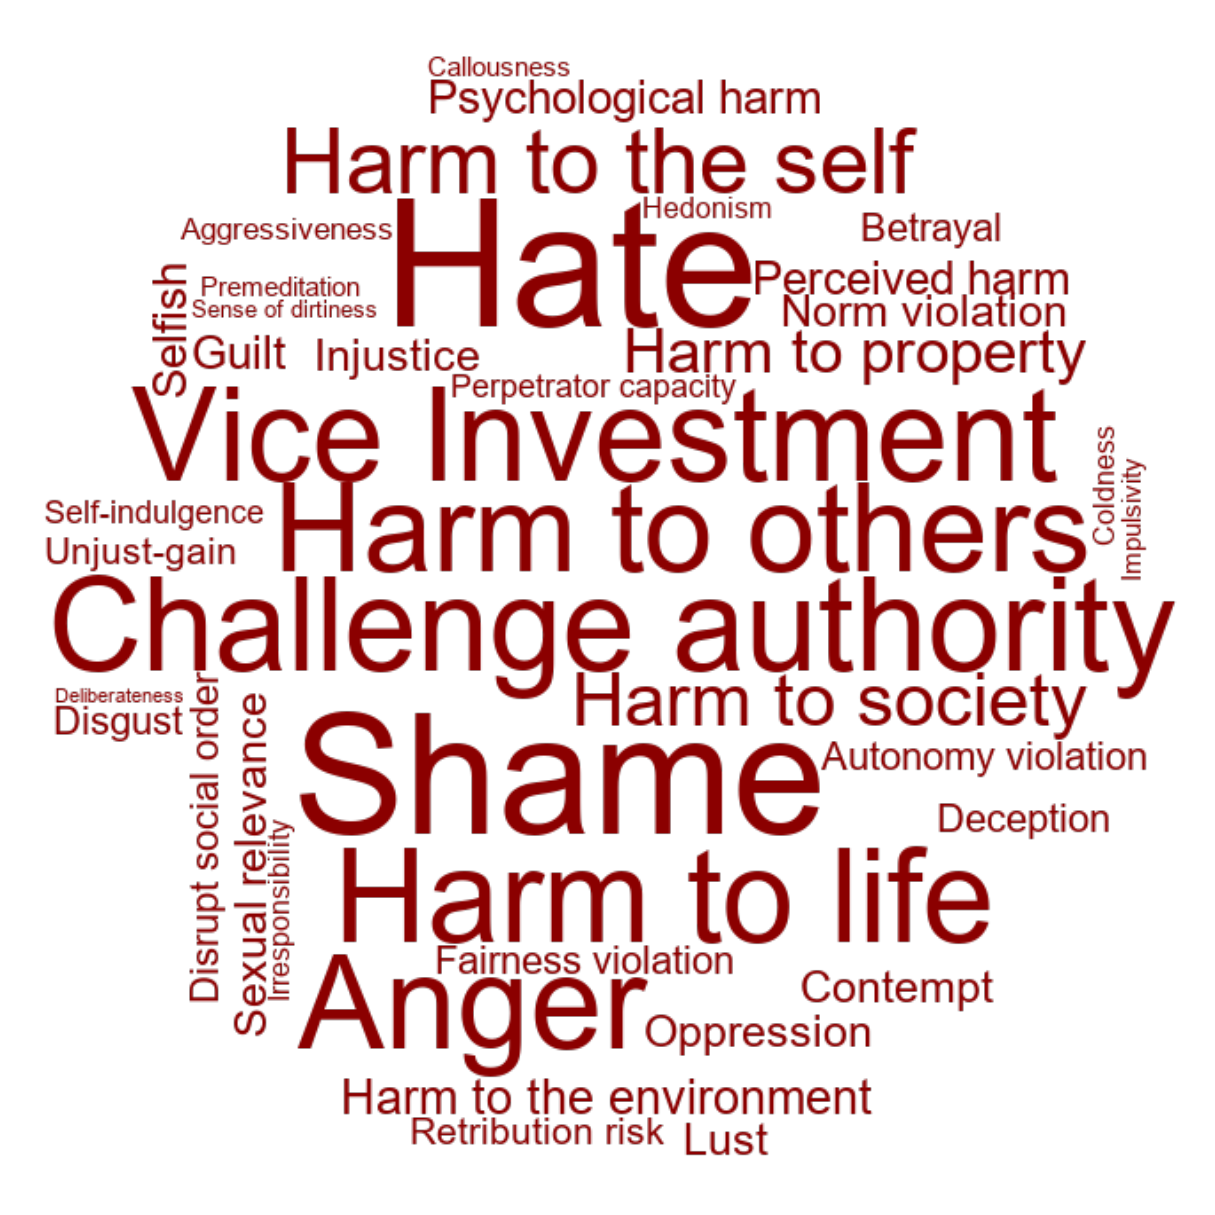

In [15]:
feature_evil_eng = feature_evil.loc[feature_evil['是否为40dim（全集）']==1,'names of dimensions']
# evil_df = pd.DataFrame(feature_evil_eng.str.lower())
evil_df = pd.DataFrame(feature_evil_eng)
evil_df['wordcloud'] = evil_df['names of dimensions']#.replace({'harm to others':'harm'})
evil_df['freq_nltk'] = evil_df['wordcloud'].apply(lambda x: zipf_frequency(x, 'en'))

word_freq_dict = dict(zip(evil_df['wordcloud'], evil_df['freq_nltk']))
wordcloud = WordCloud(background_color=None,width=400, height=400, mask=mask,max_font_size = 100,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               mode='RGBA',color_func=lambda *args, **kwargs: "#8b0000").generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(5, 5), dpi = 300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('evil_wordcloud.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

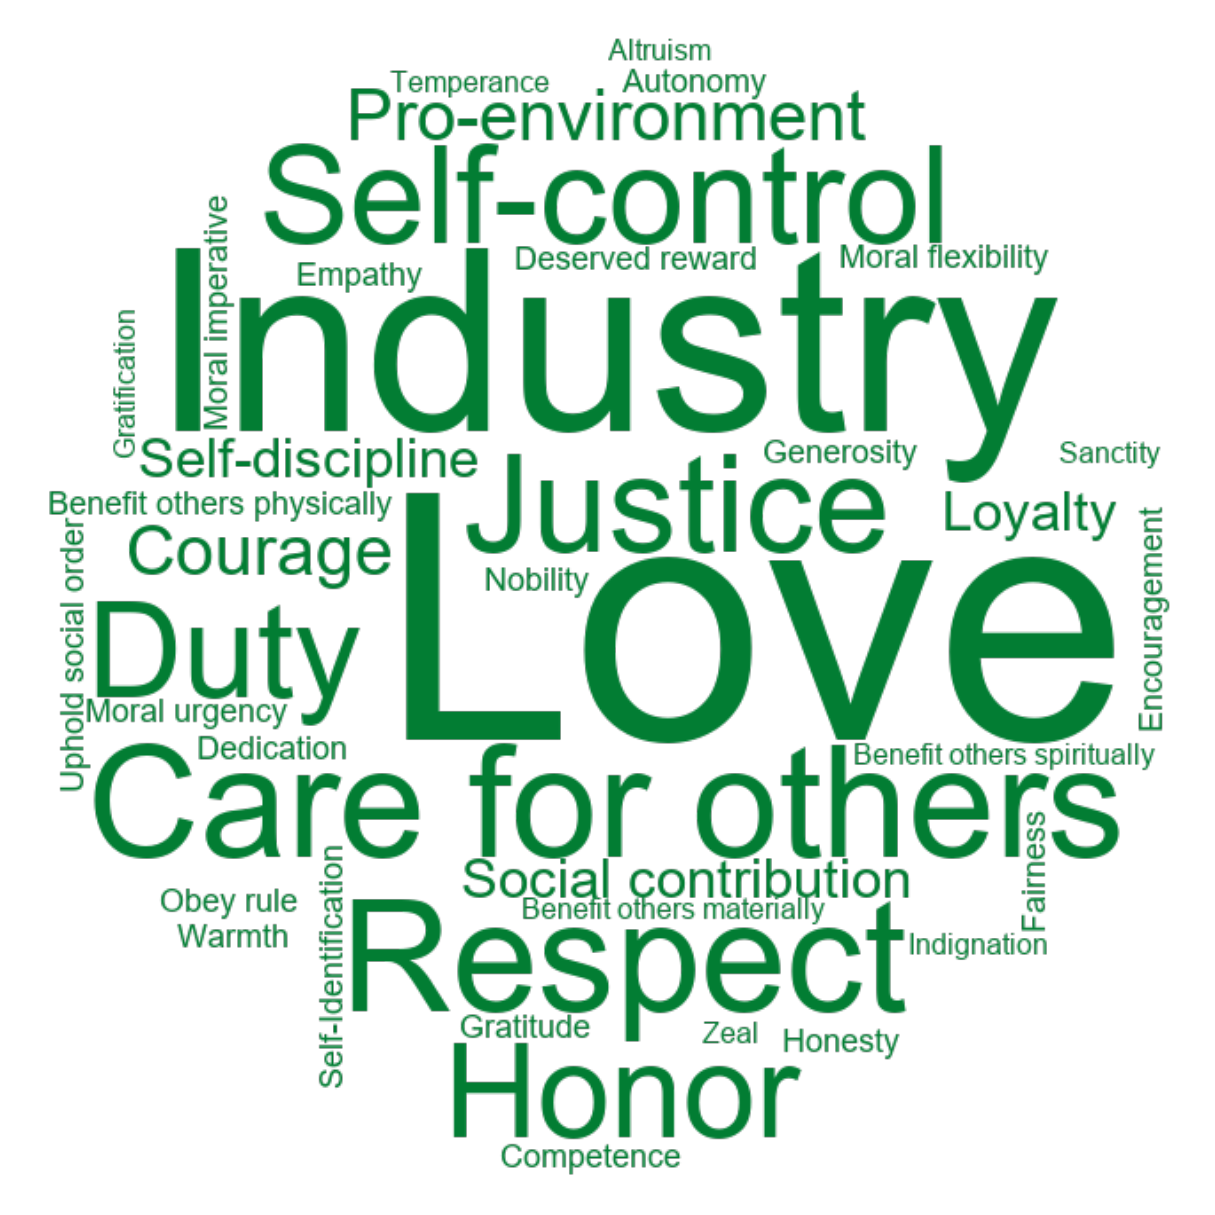

In [16]:
feature_good_eng = feature_good.loc[feature_good['是否为40dim（全集）']==1,'names of dimensions']
# good_df = pd.DataFrame(feature_good_eng.str.lower())
good_df = pd.DataFrame(feature_good_eng)
good_df['wordcloud'] = good_df['names of dimensions']
good_df['wordcloud'] = good_df['names of dimensions']
good_df['freq_nltk'] = good_df['wordcloud'].apply(lambda x: zipf_frequency(x, 'en'))

word_freq_dict = dict(zip(good_df['wordcloud'], good_df['freq_nltk']))
wordcloud = WordCloud(background_color=None,width=400, height=400, mask=mask,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               mode='RGBA',color_func=lambda *args, **kwargs: "#027d33",).generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(5, 5), dpi = 300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('good_wordcloud.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()